___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
tickers=['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
result=[]
for i in tickers:
    df=pdr.get_data_morningstar(i, start, end)
    result.append(df)

In [3]:
result[1].head()

Close   High    Low   Open   Volume
Symbol Date                                           
C      2006-01-02  485.3  487.1  482.2  483.5        0
       2006-01-03  492.9  493.8  481.1  490.0  1536700
       2006-01-04  483.8  491.0  483.5  488.6  1852790
       2006-01-05  486.2  487.8  484.0  484.4  1015470
       2006-01-06  486.2  489.0  482.0  488.8  1358930

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
result2=[]
for i in range(len(result)):
    df2=result[i].unstack(level=0)
    result2.append(df2)

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [5]:
bank_stocks=pd.concat(result2,axis=1)
bank_stocks.tail()

,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Symbol,BAC,BAC,BAC,BAC,BAC,C,C,C,C,C,...,MS,MS,MS,MS,MS,WFC,WFC,WFC,WFC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-28,17.13,17.23,16.98,17.22,41772177,52.38,52.57,51.96,52.57,8760674,...,32.17,32.3600,31.950,32.36,5420280,54.68,54.7800,54.170,54.55,8288841
2015-12-29,17.28,17.35,17.16,17.25,45628949,52.98,53.22,52.74,52.76,10153634,...,32.55,32.7016,32.325,32.44,6388244,55.29,55.3500,54.990,55.11,7894876
2015-12-30,17.05,17.24,17.04,17.20,35046768,52.30,52.94,52.25,52.84,8763137,...,32.23,32.6450,32.200,32.50,5057162,54.89,55.3100,54.794,55.27,8016893
2015-12-31,16.83,17.07,16.83,17.01,47119705,51.75,52.39,51.75,52.07,11275231,...,31.81,32.3000,31.770,31.91,8149307,54.36,54.9499,54.220,54.51,10929567
2016-01-01,16.83,16.83,16.83,16.83,0,51.75,51.75,51.75,51.75,0,...,31.81,31.8100,31.810,31.81,0,54.36,54.3600,54.360,54.36,0


** Set the column name levels (this is filled out for you):**

In [6]:
bank_stocks.columns.names = ['Stock Info','Bank Tickers']

** Check the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Stock Info,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Bank Tickers,BAC,BAC,BAC,BAC,BAC,C,C,C,C,C,...,MS,MS,MS,MS,MS,WFC,WFC,WFC,WFC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,46.15,46.36,45.91,46.02,0,485.3,487.1,482.2,483.5,0,...,47.1008,47.3333,46.7107,47.2751,0,31.415,31.535,31.215,31.415,0
2006-01-03,47.08,47.18,46.15,46.92,16197900,492.9,493.8,481.1,490.0,1536700,...,48.4041,48.5535,47.1008,47.4578,6354408,31.900,31.975,31.195,31.600,11015000
2006-01-04,46.58,47.24,46.45,47.00,17427400,483.8,491.0,483.5,488.6,1852790,...,48.4373,49.2093,48.4373,48.7278,9292188,31.530,31.820,31.365,31.800,10594000
2006-01-05,46.64,46.83,46.32,46.58,14668900,486.2,487.8,484.0,484.4,1015470,...,48.5701,48.6365,48.1634,48.6033,6534262,31.495,31.555,31.310,31.500,9927600
2006-01-06,46.57,46.91,46.35,46.80,11965700,486.2,489.0,482.0,488.8,1358930,...,48.6199,48.8524,48.1883,48.7860,8146445,31.680,31.775,31.385,31.580,8324000


Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.Close.max()

Bank Tickers
BAC     54.9000
C      564.1000
GS     247.9200
JPM     70.0800
MS      74.1294
WFC     58.5200
dtype: float64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns=pd.DataFrame()
for i in tickers:
    returns[i+' Return']=bank_stocks['Close', i].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.020152,0.015660,0.009083,0.012598,0.027670,0.015438
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

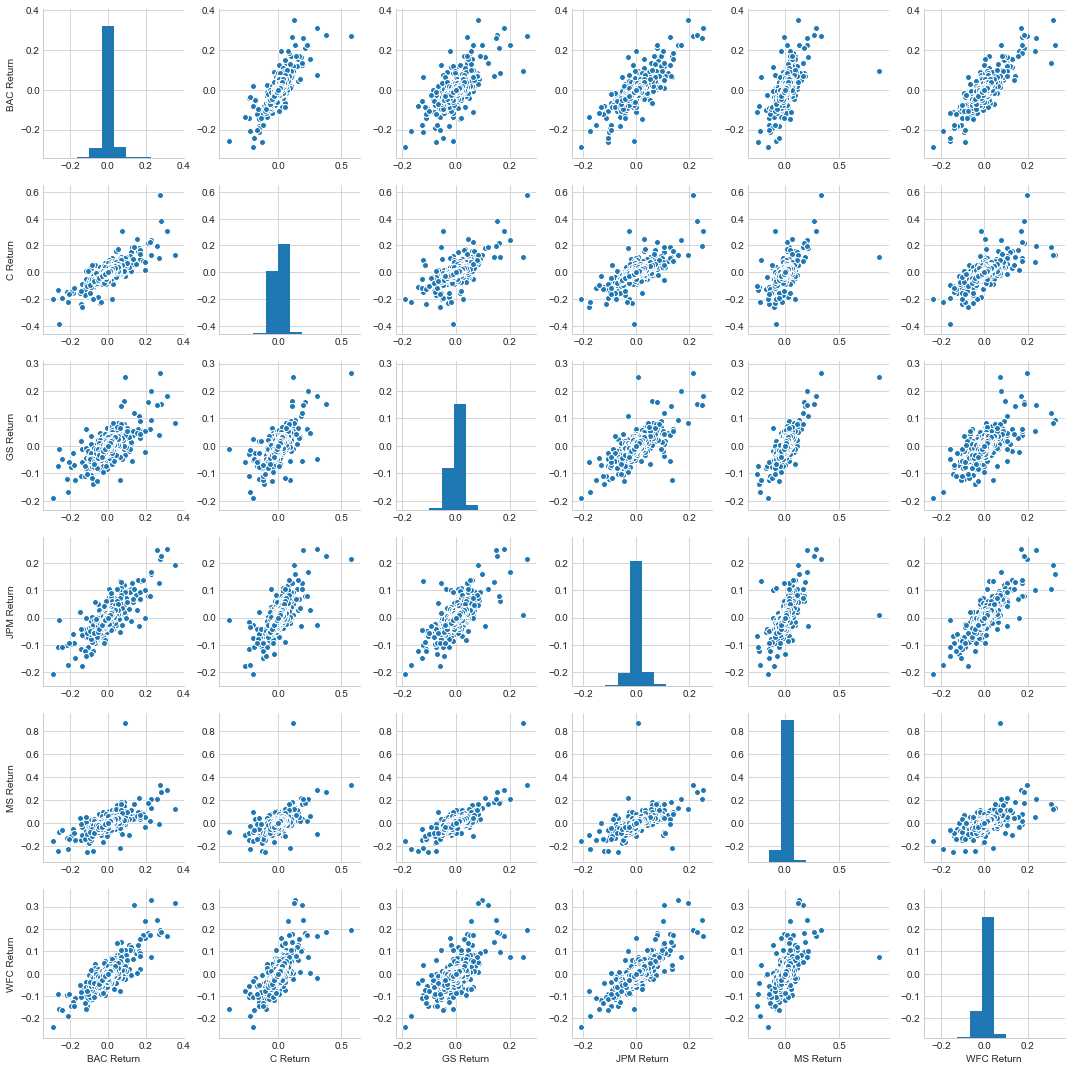

In [11]:
sns.set_style('whitegrid')
sns.pairplot(returns[1:])

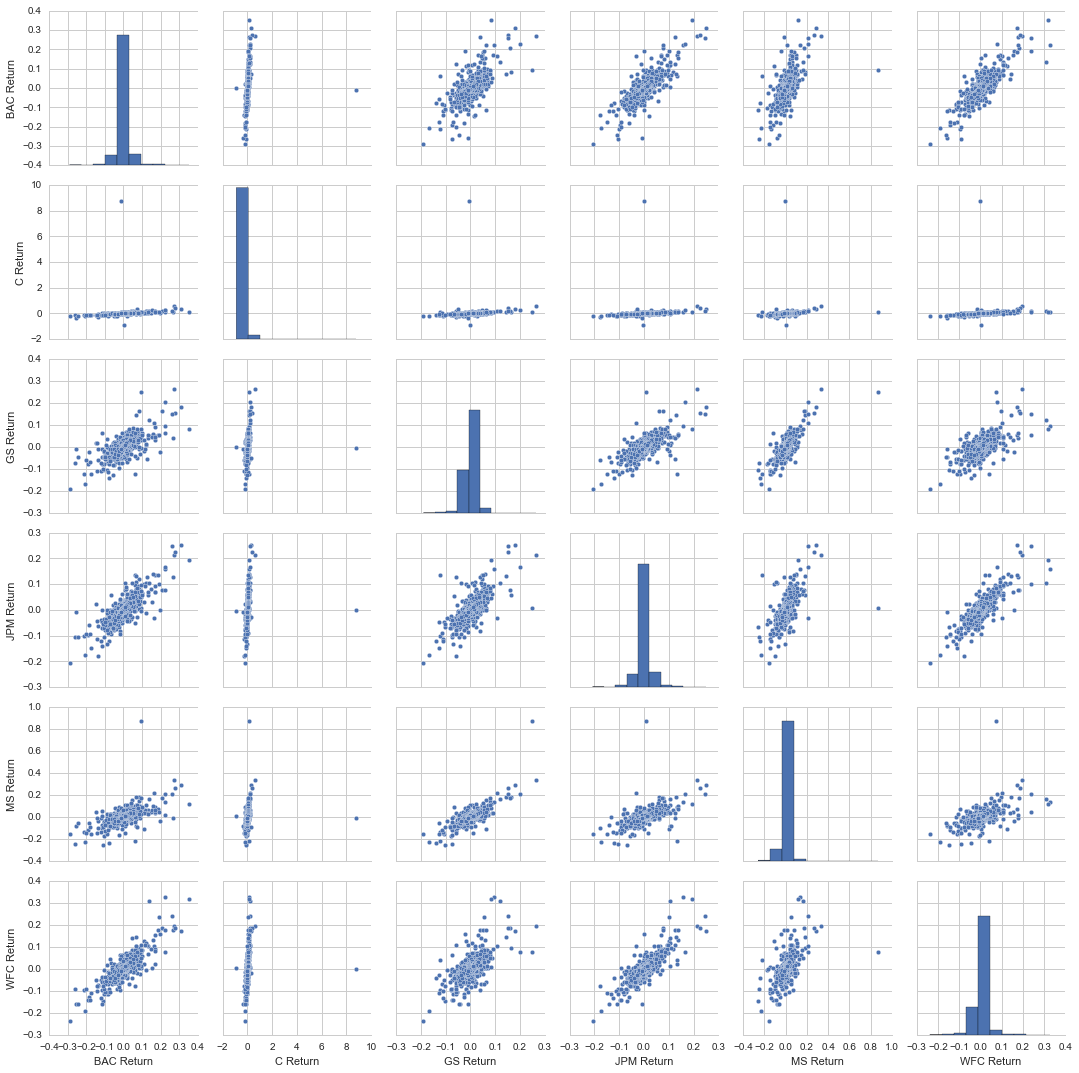

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [28]:
y=[]
for i in returns.columns:
    y.append(returns[i].loc[returns[i]==returns[i].min()])
y

[Date
 2009-01-20   -0.289694
 Freq: B, Name: BAC Return, dtype: float64, Date
 2009-02-27   -0.390244
 Freq: B, Name: C Return, dtype: float64, Date
 2009-01-20   -0.189596
 Freq: B, Name: GS Return, dtype: float64, Date
 2009-01-20   -0.207274
 Freq: B, Name: JPM Return, dtype: float64, Date
 2008-10-09   -0.258929
 Freq: B, Name: MS Return, dtype: float64, Date
 2009-01-20   -0.238223
 Freq: B, Name: WFC Return, dtype: float64]

In [77]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [78]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [14]:
returns.std(axis=0)

BAC Return    0.035987
C Return      0.037977
GS Return     0.024950
JPM Return    0.027223
MS Return     0.037043
WFC Return    0.029697
dtype: float64

BAC Return    0.035987
C Return      0.037977
GS Return     0.024950
JPM Return    0.027223
MS Return     0.037043
WFC Return    0.029697
dtype: float64

In [15]:
returns.loc['2015-01-01':'2015-12-31'].std(axis=0)

BAC Return    0.015880
C Return      0.015022
GS Return     0.013801
JPM Return    0.013772
MS Return     0.015966
WFC Return    0.012372
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

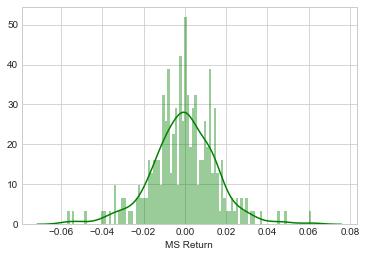

In [29]:
sns.distplot(returns['MS Return'].loc['2015-01-01':'2015-12-31'], bins=100, color='green')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



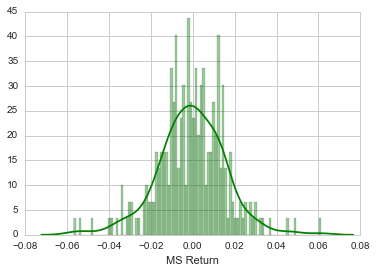

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

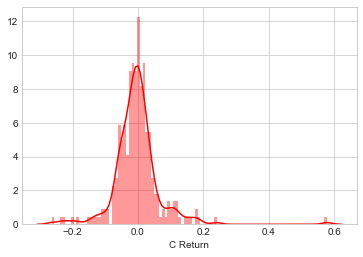

In [30]:
sns.distplot(returns['C Return'].loc['2008-01-01':'2008-12-31'], bins=100, color='red')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



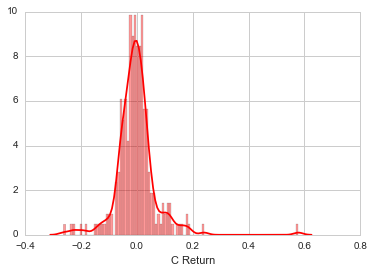

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [31]:
# Optional Plotly Method Imports
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

Text(0,0.5,'Close')

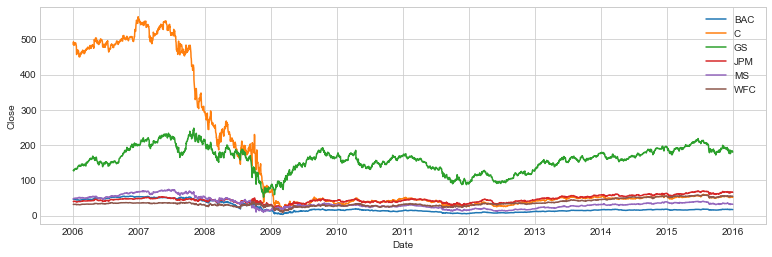

In [32]:
fig=plt.figure(figsize=(13,4))
plt.plot(bank_stocks.Close)
plt.legend(tickers)
plt.xlabel('Date')
plt.ylabel('Close')

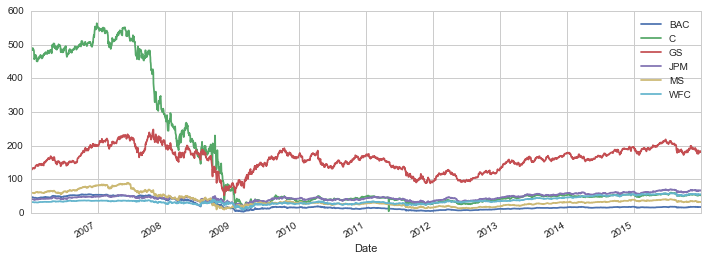

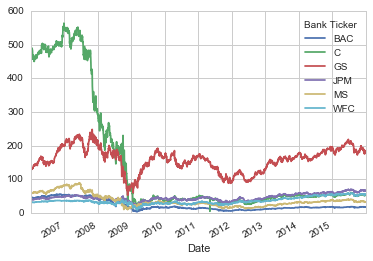

In [36]:
bank_stocks.Close.iplot(kind='scatter')

# Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [50]:
for i in tickers:
    bank_stocks['Rolling_mean',i]=bank_stocks['Close', i].rolling(window=30,center=True).mean()

bank_stocks.tail()

Stock Info    Close   High    Low   Open    Volume  Close   High    Low  \
Bank Tickers    BAC    BAC    BAC    BAC       BAC      C      C      C   
Date                                                                      
2015-12-28    17.13  17.23  16.98  17.22  41772177  52.38  52.57  51.96   
2015-12-29    17.28  17.35  17.16  17.25  45628949  52.98  53.22  52.74   
2015-12-30    17.05  17.24  17.04  17.20  35046768  52.30  52.94  52.25   
2015-12-31    16.83  17.07  16.83  17.01  47119705  51.75  52.39  51.75   
2016-01-01    16.83  16.83  16.83  16.83         0  51.75  51.75  51.75   

Stock Info     Open    Volume ...     High     Low   Open    Volume  \
Bank Tickers      C         C ...      WFC     WFC    WFC       WFC   
Date                          ...                                     
2015-12-28    52.57   8760674 ...  54.7800  54.170  54.55   8288841   
2015-12-29    52.76  10153634 ...  55.3500  54.990  55.11   7894876   
2015-12-30    52.84   8763137 ...  55.3100  54.794  55.27   8016893   
2015-12-31    52.07  11275231 ...  54.9499  54.220  54.51  10929567   
2016-01-01    51.75         0 ...  54.3600  54.360  54.36         0   

Stock Info   Rolling_mean                      
Bank Tickers          BAC   C  GS JPM  MS WFC  
Date                                           
2015-12-28            NaN NaN NaN NaN NaN NaN  
2015-12-29            NaN NaN NaN NaN NaN NaN  
2015-12-30            NaN NaN NaN NaN NaN NaN  
2015-12-31            NaN NaN NaN NaN NaN NaN  
2016-01-01            NaN NaN NaN NaN NaN NaN  

[5 rows x 36 columns]

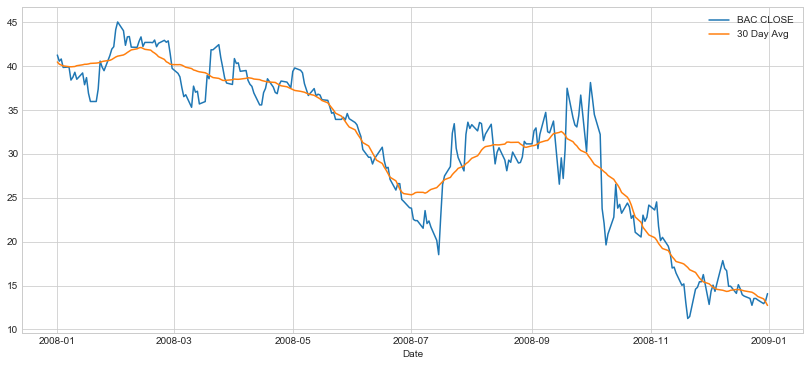

In [57]:
fig=plt.figure(figsize=(14,6))
plt.plot(bank_stocks['Close', 'BAC'].loc['2008-01-01':'2008-12-31'])
plt.plot(bank_stocks['Rolling_mean', 'BAC'].loc['2008-01-01':'2008-12-31'])
plt.xlabel('Date')
plt.legend(['BAC CLOSE', '30 Day Avg'])

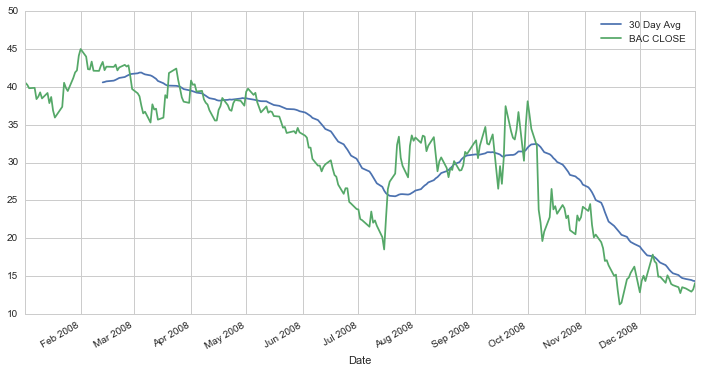

** Create a heatmap of the correlation between the stocks Close Price.**

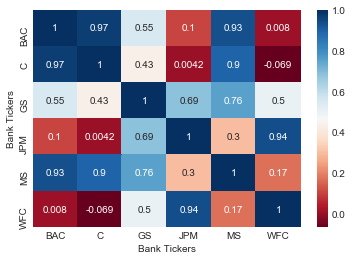

In [68]:
sns.heatmap(bank_stocks.Close.corr(),annot=True, cmap='RdBu')

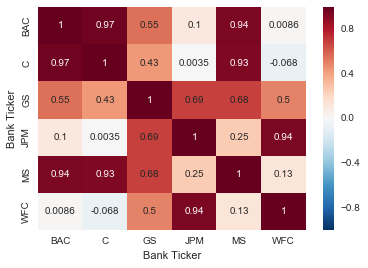

** Optional: Use seaborn's clustermap to cluster the correlations together:**

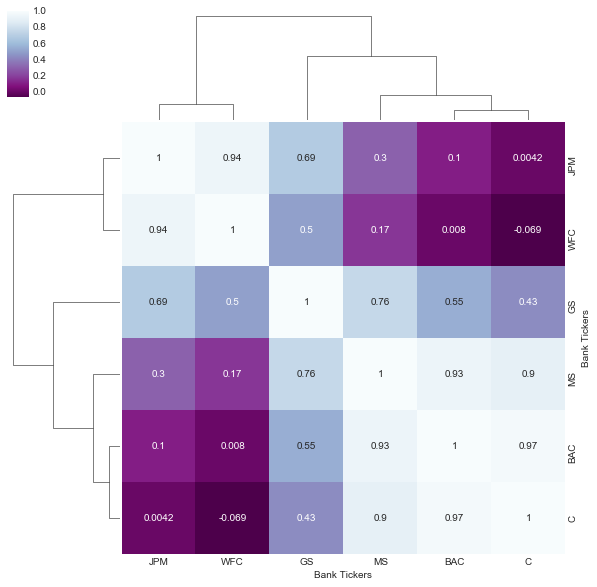

In [76]:
sns.clustermap(bank_stocks.Close.corr(), annot=True, cmap='BuPu_r')

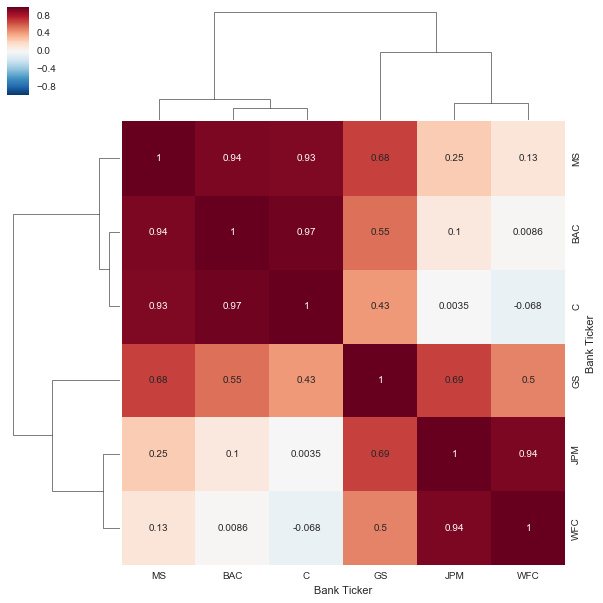

In [64]:
bank_stocks.Close.corr().iplot(kind='heatmap', colorscale='RdYlBu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [37]:
bank_stocks.xs('BAC',axis=1, level=1).loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [62]:
bank_stocks['Close','MS'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [61]:
bank_stocks['Close','BAC'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.